In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import *

In [32]:
!pip install pyspark-dist-explore

  Using cached pyspark_dist_explore-0.1.8-py3-none-any.whl (7.2 kB)


In [2]:
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()
df = spark.read.option("header",True).csv("data/CC_LCL-FullData.csv")
df.printSchema()

root
 |-- LCLid: string (nullable = true)
 |-- stdorToU: string (nullable = true)
 |-- DateTime: string (nullable = true)
 |-- KWH/hh (per half hour) : string (nullable = true)



In [ ]:
df.count()

In [8]:
df = df.withColumn("DateTime",df.DateTime.astype('Timestamp'))
#https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/
df3=df.select(col("DateTime"),
             col("LCLid").alias(("id")),
            col("stdorToU").alias("std"),
            col("KWH/hh (per half hour) ").alias("kwh"),
     year(col("DateTime")).alias("year"),
     month(col("DateTime")).alias("month"),
    dayofmonth(col("DateTime")).alias("date"),
    hour(col("DateTime")).alias("hour"),
    minute(col("DateTime")).alias("min"),
  )pip install pyspark-dist-explore



In [29]:
#The dataset  consist from 165M++ rows
df.count()

167932474

In [9]:
import pandas as pd

from datetime import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Reading Weather data
df_weather = pd.read_csv("data/add/weather_hourly_darksky.csv")

In [11]:
# Creating date, time related columns
df_weather = df_weather[['temperature', 'time']]
df_weather.columns = ['temperature', 'DateTime']
df_weather['DateTime'] = pd.to_datetime(df_weather['DateTime'])
df_weather['year'] = df_weather['DateTime'].dt.year
df_weather['month'] = df_weather['DateTime'].dt.month
df_weather['day'] = df_weather['DateTime'].dt.day
df_weather['time'] = df_weather['DateTime'].dt.time


In [12]:
#### Weather information for the year 2013
df_weather_2013 = df_weather[df_weather.year==2013][['temperature', 'month']]
df_weather_2013 = df_weather_2013.groupby(by=['month'])['temperature'].mean().to_frame()
df_weather_2013.reset_index(level=0, inplace=True)
df_weather_2013.month = df_weather_2013.month.apply(lambda x: calendar.month_abbr[x])


In [14]:
#### Weather information for the year 2014
df_weather_2014 = df_weather[df_weather.year==2014][['temperature', 'month']]
df_weather_2014 = df_weather_2014.groupby(by=['month'])['temperature'].mean().to_frame()
df_weather_2014.reset_index(level=0, inplace=True)
df_weather_2014.month = df_weather_2014.month.apply(lambda x: calendar.month_abbr[x])


In [15]:
# Reading Household info data
df_household = pd.read_csv("data/add/informations_households.csv", encoding="utf-8")


In [21]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

#filter the data for one househd
df3.filter(df3.id=='MAC000002').count()


24158

In [22]:

#household convert spark  dataframe
householdd=spark.createDataFrame(df_household)

#Join two DataSet
df4=df3.join(householdd, df3.id == householdd.LCLid, 'left')
df5=df4.withColumn("kwh", df4.kwh.cast('double'))


#convert string energy cosumtion data to double
df5=df4.withColumn("kwh", df4.kwh.cast('double'))

#filter thepip install pyspark-dist-explore data to perform to  a smaller sample all the
dff=df3.filter(df3.id=='MAC000002')


#innerjoin with household and energy
#Apply filter to have better result
df6=dff.join(householdd, dff.id == householdd.LCLid, 'left')
#convert string to Chriss
df7=df6.withColumn("kwh", df6.kwh.cast('double'))

In [23]:

df8=df7.groupby("id","std","year","month","date","hour").sum("kwh")


print("Before casting")
df8.printSchema()
df8_hours=df8.withColumn("hours",df8['hour'].cast('integer'))
print("After casting")
df8_hours.printSchema()

pivot_df = df8_hours.groupby("id","year","month","date").pivot("hours").sum("sum(kwh)")


#apply for all data in the dataset the aggregation sums

#first we aggregate in hours , in this data set we have every half hour so we sum every hour
# In the Eveddent dataset we do not need to aggredate every hour
df_all8=df5.groupby("id","std","year","month","date","hour").sum("kwh")
#make ne aggregation per data


from pyspark.sql import functions as f

#create agragate columns for one day avg/max.min/standard division and sum of energy 
df_all_statistics=df5.groupby("id","std","year","month","date").agg(f.sum("kwh"),f.avg("kwh"),f.max("kwh"),f.min("kwh"),f.count("kwh"),f.stddev_pop("kwh"))


Before casting
root
 |-- id: string (nullable = true)
 |-- std: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- sum(kwh): double (nullable = true)

After casting
root
 |-- id: string (nullable = true)
 |-- std: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- sum(kwh): double (nullable = true)
 |-- hours: integer (nullable = true)



In [26]:
#print the df
df_all_statistics.head(5)

[Row(id='MAC000032', std='Std', year=2011, month=12, date=7, sum(kwh)=3.5269999999999997, avg(kwh)=0.15334782608695652, max(kwh)=0.692, min(kwh)=0.015, count(kwh)=23, stddev_pop(kwh)=0.20240609388825276),
 Row(id='MAC000032', std='Std', year=2011, month=12, date=8, sum(kwh)=17.6700001, avg(kwh)=0.3681250020833333, max(kwh)=2.5050001, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.5694364846124748),
 Row(id='MAC000032', std='Std', year=2011, month=12, date=9, sum(kwh)=18.41300040000001, avg(kwh)=0.38360417500000016, max(kwh)=2.5680001, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.6339574196381306),
 Row(id='MAC000032', std='Std', year=2011, month=12, date=10, sum(kwh)=21.75300010000001, avg(kwh)=0.4531875020833335, max(kwh)=2.586, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.6246162401870999),
 Row(id='MAC000032', std='Std', year=2011, month=12, date=11, sum(kwh)=19.146000000000004, avg(kwh)=0.3988750000000001, max(kwh)=2.648, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.68598

In [27]:
#The previous print for better visual each row
for i in df_all_statistics.head(5):
    print(i)

Row(id='MAC000032', std='Std', year=2011, month=12, date=7, sum(kwh)=3.5269999999999997, avg(kwh)=0.15334782608695652, max(kwh)=0.692, min(kwh)=0.015, count(kwh)=23, stddev_pop(kwh)=0.20240609388825276)
Row(id='MAC000032', std='Std', year=2011, month=12, date=8, sum(kwh)=17.6700001, avg(kwh)=0.3681250020833333, max(kwh)=2.5050001, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.5694364846124748)
Row(id='MAC000032', std='Std', year=2011, month=12, date=9, sum(kwh)=18.41300040000001, avg(kwh)=0.38360417500000016, max(kwh)=2.5680001, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.6339574196381306)
Row(id='MAC000032', std='Std', year=2011, month=12, date=10, sum(kwh)=21.75300010000001, avg(kwh)=0.4531875020833335, max(kwh)=2.586, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.6246162401870999)
Row(id='MAC000032', std='Std', year=2011, month=12, date=11, sum(kwh)=19.146000000000004, avg(kwh)=0.3988750000000001, max(kwh)=2.648, min(kwh)=0.01, count(kwh)=48, stddev_pop(kwh)=0.68598228308632

**df_all_statistics is the final dayly aggregation**

In [30]:
#df_all_statistics is the final dayly aggregation
df_all_statistics.count()

3510433

In [24]:

print("Before casting")
df_all8.printSchema()

df_all_hours=df_all8.withColumn("hours",df_all8['hour'].cast('integer'))
print("After casting")
df_all_hours.printSchema()
pivot_df_all=df_all_hours.groupby("id","year","month","date").pivot("hours").sum("sum(kwh)")
#dataset = pivot_df_all.groupby("id","year","month","date").sum("sum(kwh)").avg("sum(kwh)")("sum(kwh)").min("sum(kwh)").count("sum(kwh)").std("sum(kwh)")

pivot_df_all.count()


Before casting
root
 |-- id: string (nullable = true)
 |-- std: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- sum(kwh): double (nullable = true)

After casting
root
 |-- id: string (nullable = true)
 |-- std: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- sum(kwh): double (nullable = true)
 |-- hours: integer (nullable = true)



3510433

(array([3.011254e+06, 4.088510e+05, 6.359100e+04, 1.654200e+04,
        5.842000e+03, 2.312000e+03, 1.105000e+03, 5.350000e+02,
        2.150000e+02, 7.800000e+01, 1.500000e+01, 1.500000e+01,
        4.000000e+00, 5.000000e+00, 6.000000e+00, 1.300000e+01,
        5.000000e+00, 5.000000e+00, 7.000000e+00, 3.000000e+00]),
 array([  0.        ,  16.62780005,  33.2556001 ,  49.88340015,
         66.5112002 ,  83.13900025,  99.7668003 , 116.39460035,
        133.0224004 , 149.65020045, 166.2780005 , 182.90580055,
        199.5336006 , 216.16140065, 232.7892007 , 249.41700075,
        266.0448008 , 282.67260085, 299.3004009 , 315.92820095,
        332.556001  ]),
 <BarContainer object of 20 artists>)

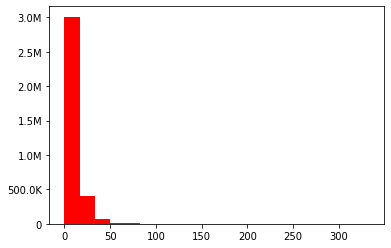

In [33]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df_all_statistics.select('year','sum(kwh)'), bins = 20, color=['red'])

In [ ]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df_all_statistics.select('year','sum(kwh)'), bins = 20, color=['red'])

In [ ]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df_all_statistics.select('sum(kwh)'), bins = 'year', color=['red'])

In [28]:
#the Data freame was 165M. but aftew aggregation is 3.5M we set 

In [ ]:
#We are going to aggregation energy per, / year /months and weak days to plot and see the distubition